In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gmt import Interval, Cube, Ball, plot_cube, plot_cubes, plot_ball, plot_balls, plot_centers, plot_circle,plot_circles
import seaborn as sns

The code in the next cell I used in a video (https://youtu.be/zJX8tJ6_Vr0) about the existence of sets with finite and positiv Hausdorff measure whose lower densities were zero everywhere.

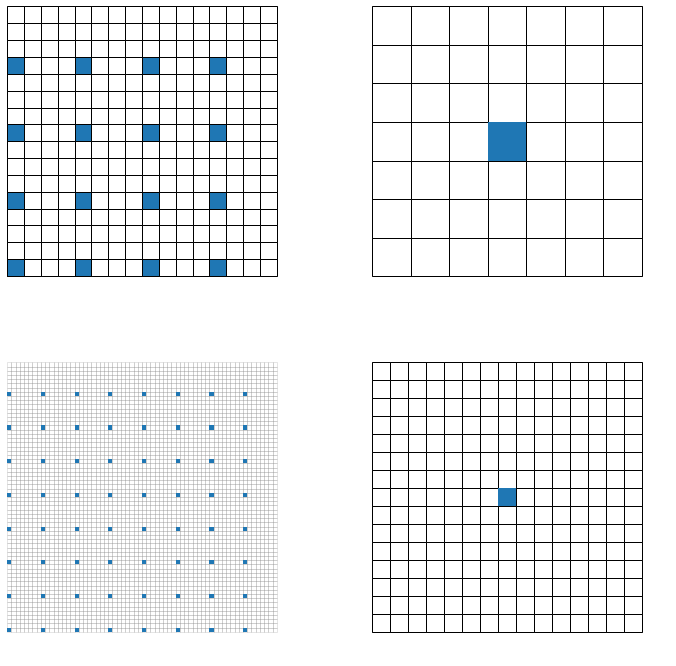

In [2]:
Q = Cube([[0,2**(-4)],[0,2**(-4)]])

cubes = [Q + np.array([i*(2**(-2)),j*(2**(-2))]) for i in range(2**2) for j in range(2**2)]

fig, ax = plt.subplots(2,2, figsize = (12,12))

plot_cubes(Cube([[0,1],[0,1]]).children(2**4), ax=ax[0,0], facecolor="white", edgecolor="black")
plot_cubes(cubes,ax=ax[0,0], edgecolor="black")

Q = Cube([[0,2**(-6)],[0,2**(-6)]])

cubes = [Q + np.array([i*(2**(-3)),j*(2**(-3))]) for i in range(2**3) for j in range(2**3)]


plot_cubes(Cube([[0,1],[0,1]]).children(2**6), ax=ax[1,0], facecolor="white", edgecolor="black", alpha=.1)
plot_cubes(cubes,ax=ax[1,0])

plot_cubes(Cube([[0,1],[0,1]]).children(7), ax=ax[0,1], facecolor="white", edgecolor="black")

plot_cube((1/7)*Cube([[0,1],[0,1]]), ax=ax[0,1])


n=(2**3-1)*2+1
plot_cubes(Cube([[0,1],[0,1]]).children(n), ax=ax[1,1], facecolor="white", edgecolor="black")

plot_cube((1/n)*Cube([[0,1],[0,1]]), ax=ax[1,1])



for i in [0,1]:
    for j in [0,1]:
        a=ax[i,j]
        a.set_aspect("equal")
        a.axis("off")
        a.set_xlim([0,1.1])
        a.set_ylim([-.1,1])



The map below is a helper function meant to represent the blowup transformation $T_{a,r}(x) = \frac{x-a}{r}$ fundamental to the study of tangent measures.

In [9]:


def T_up(a,r,x):
    a=np.array(a).reshape(2,-1)
    if type(x) is Ball:
        return Ball((r ** (-1))*(B.x.reshape(2,-1)-a).flatten(),B.r/r)
    else:
        x=np.array(x).reshape(2,-1)
    
        return (r ** (-1))*(x-a)

In the next cell I come up with some image to illustrate how zooming in on a curve at a point in smaller and smaller balls begins to look more and more like a straight line.

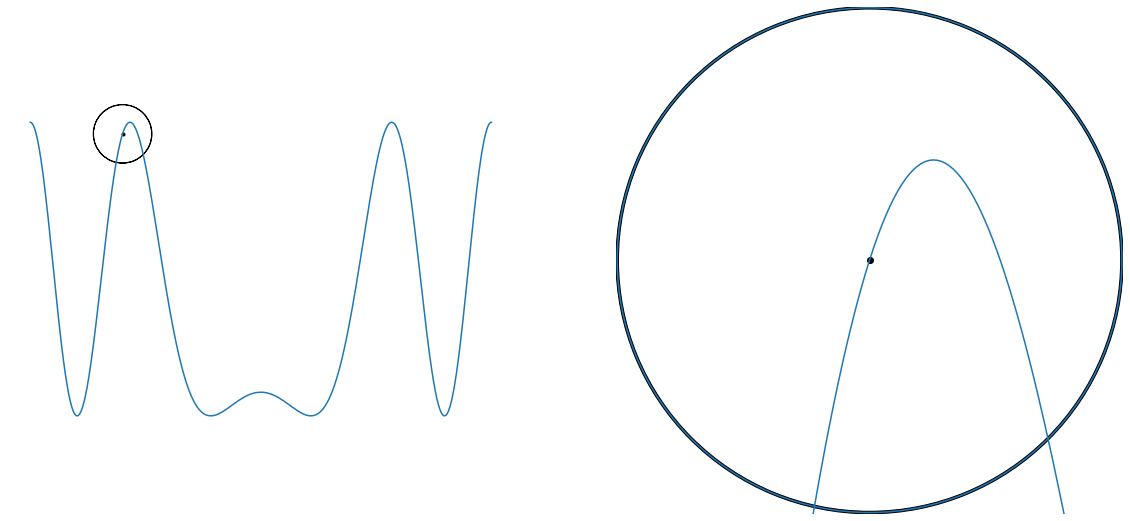

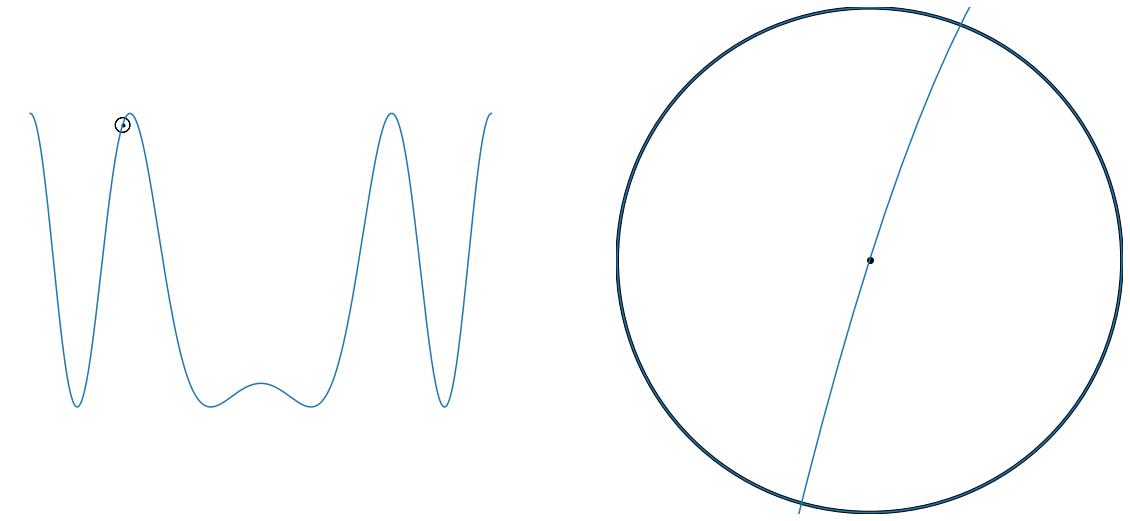

In [10]:
def default(ax):
    ax.set_aspect("equal")
    ax.axis("off")

x = np.linspace(0,np.pi,1000)

f = np.array([x,np.cos(10*np.sin(x))])

fig,axes = plt.subplots(1,2, figsize = (20,10))

n=200
ax=axes[0]
default(ax)
ax.plot(f[0],f[1])
B = Ball(f[:,n],.2)
plot_circles([B],ax=ax,centers="black", edgecolor="k")

ax.set_aspect("equal")

ax=axes[1]
default(ax)

F = T_up(B.x,B.r,f)

ax.plot(F[0],F[1])
ax.set_aspect("equal")
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plot_circles([Ball([0,0],1)], ax=ax,edgecolor="black", centers="black")
ax.scatter([0],[0],color="black")


fig,axes = plt.subplots(1,2, figsize = (20,10))

ax=axes[0]
default(ax)
ax.plot(f[0],f[1])
B = Ball(f[:,n],.05)
plot_circles([B],ax=ax,centers="black", edgecolor="k")

ax.set_aspect("equal")

ax=axes[1]
default(ax)

F = T_up(B.x,B.r,f)

ax.plot(F[0],F[1])
ax.set_aspect("equal")
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plot_circles([Ball([0,0],1)], ax=ax,edgecolor="black", centers="black")
ax.scatter([0],[0],color="black")


Below are some illustrations I used for Marstrand's Theorem which appeared in the video https://youtu.be/BSHTPl-qp8I, which you can watch if you want to see the context.

In [15]:
theta = 2*np.pi*np.random.rand(1000000)
v = .02*np.array([np.cos(theta),np.sin(theta)])
v = np.cumsum(v, axis=1)

Ball((-11.0, 2.5), 5.858863120793712)


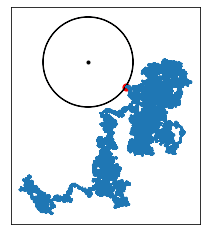

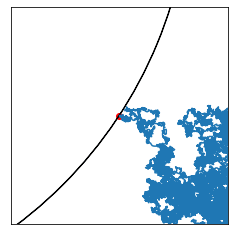

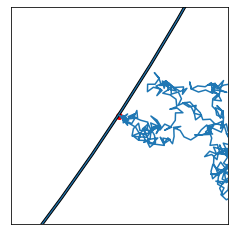

In [16]:
fig, ax  = plt.subplots()



ax.plot(v[0],v[1])
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect("equal")

c = np.array([-11,2.5])
r = np.min(np.linalg.norm(v-c.reshape(2,-1), axis=0))
B = Ball(c,r)
plot_circles([B],ax=ax, centers="black", edgecolor="k")
ax.set_aspect("equal")

i = np.argmin(np.linalg.norm(v-c.reshape(2,-1), axis=0))

p=v[:,i].flatten()

ax.scatter(p[0],p[1], s=50, color="red")






fig, ax = plt.subplots()

R = r/4
V = T_up(v[:,i],R,v)
newB = T_up(v[:,i].flatten(),R,B)


ax.plot(V[0],V[1])
ax.set_xticks([])
ax.set_yticks([])

plot_circles([newB],ax=ax, edgecolor="black",centers="black", w=.001)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_aspect("equal")
ax.scatter(0,0,color="red")


fig, ax = plt.subplots()


R = r/20
V = T_up(v[:,i],R,v)

newB = T_up(v[:,i].flatten(),R,B)
print(B)
ax.plot(V[0],V[1])
ax.set_aspect("equal")
ax.set_xticks([])
ax.set_yticks([])

plot_circles([newB],ax=ax, edgecolor="black",centers="black", w=.001)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.scatter(0,0,color="red")


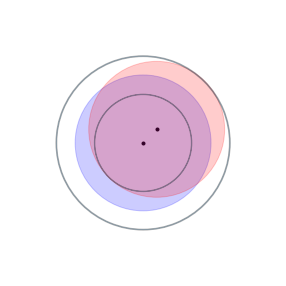

In [18]:
#This is a figure made to illustrate how to bound the symmetric difference of two balls by the difference of the measures
#of two other concentric balls, one in the intersection of the original two balls, and one containing their union.
fig,ax = plt.subplots(figsize = (5,5))
default(ax)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
O = np.array([0,0])
B = Ball(O,1)
B1 = Ball(np.array([.2,.2]),1)
plot_balls([B], ax=ax, alpha=.2, color="blue", centers="black", edgecolor="black")
plot_balls([B1], ax=ax, alpha=.2, color="red", centers="black", edgecolor="black")
plot_circles([Ball(O,1+np.sqrt(.08)), Ball(O,1-np.sqrt(.08))], ax=ax, edgecolor="black", alpha=.3)


Below is a figure showing the area between two parabolas, which 

(-1.1, 1.1, -1.1, 1.1)

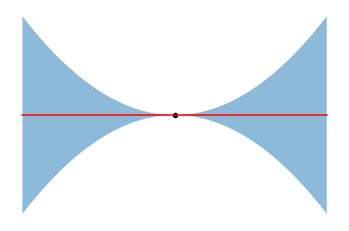

In [8]:
fig, ax = plt.subplots()

x = np.linspace(-1,1,100)
f= x**2


ax.fill_between(x,f,-f, alpha=.5)
ax.plot([-1,1],[0,0], c="r")
ax.scatter(0,0,s=20,c="k")
ax.axis("off")



(2, 1000)


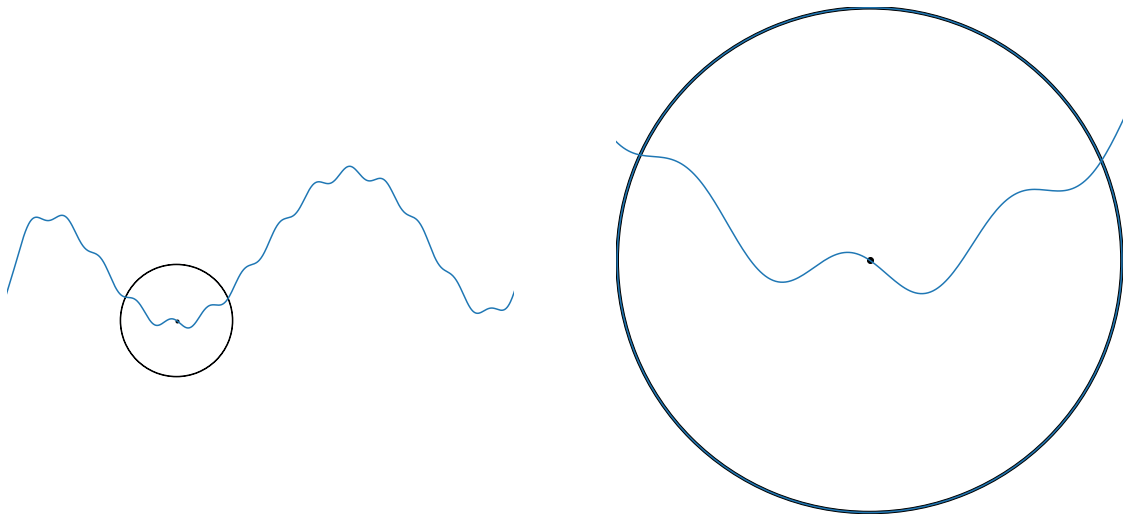

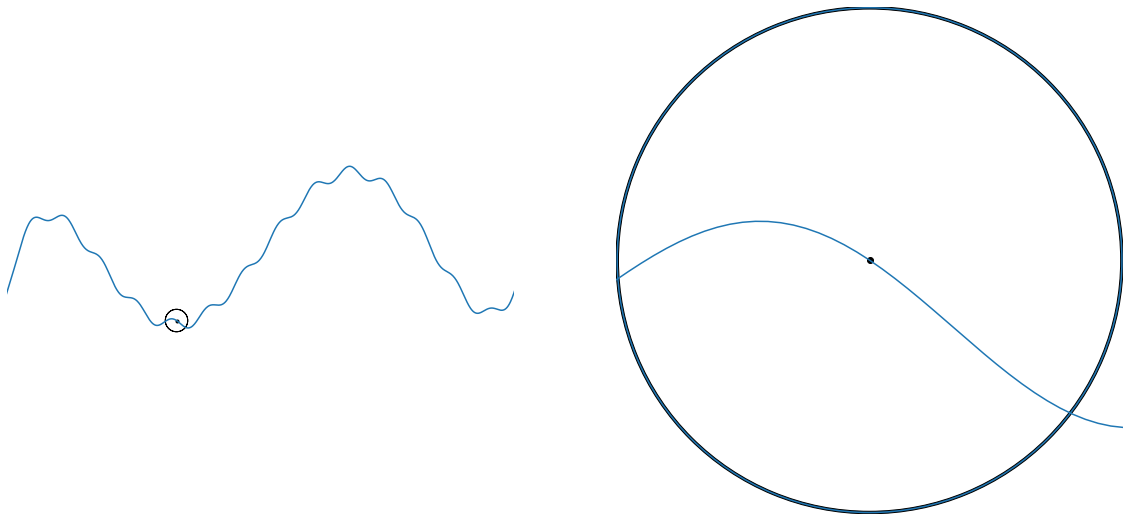

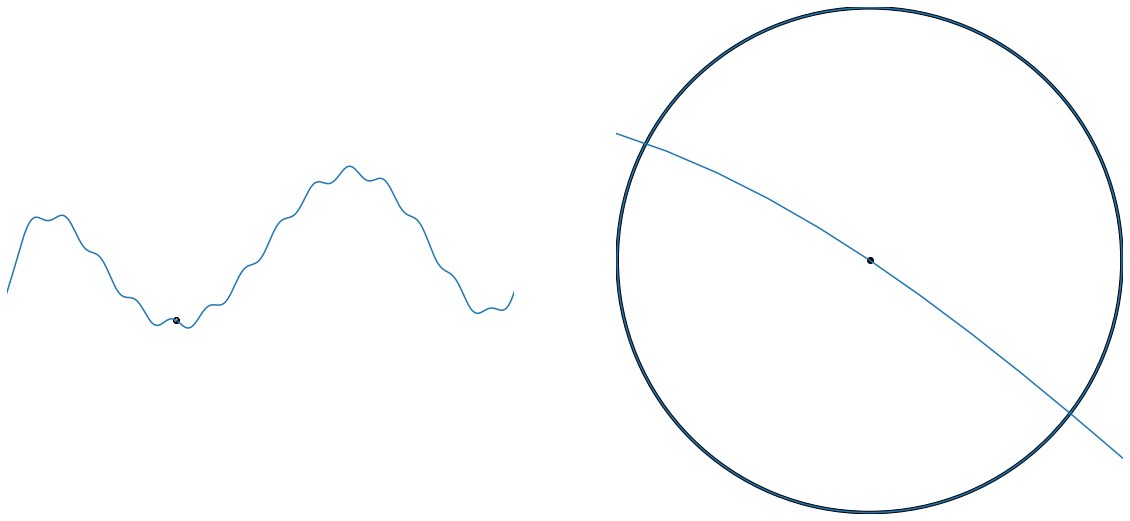

In [257]:



x = np.linspace(0,10,1000)
f = np.array([x,(x-1)*(x-3)*(x-5)*(x-9)*(x-10)/140 + .1 * np.sin(10*x)])

n=400
print(f.shape)


fig,axes = plt.subplots(1,2, figsize = (20,10))

ax=axes[0]
ax.set_xlim([1,10])
ax.set_ylim([-2,3])

ax.plot(f[0],f[1])
B = Ball(f[:,n],1)
plot_circles([B],ax=ax,centers="black", edgecolor="k")

ax.set_aspect("equal")
ax.axis("off")
ax=axes[1]
default(ax)

F = T_up(B.x,B.r,f)

ax.plot(F[0],F[1])
ax.set_aspect("equal")
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plot_circles([Ball([0,0],1)], ax=ax,edgecolor="black", centers="black")
ax.scatter([0],[0],color="black")



fig,axes = plt.subplots(1,2, figsize = (20,10))


ax=axes[0]
ax.set_xlim([1,10])
ax.set_ylim([-2,3])

ax.plot(f[0],f[1])
B = Ball(f[:,n],.2)
plot_circles([B],ax=ax,centers="black", edgecolor="k")

ax.set_aspect("equal")
ax.axis("off")
ax=axes[1]
default(ax)

F = T_up(B.x,B.r,f)

ax.plot(F[0],F[1])
ax.set_aspect("equal")
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plot_circles([Ball([0,0],1)], ax=ax,edgecolor="black", centers="black")
ax.scatter([0],[0],color="black")



fig,axes = plt.subplots(1,2, figsize = (20,10))

ax=axes[0]
ax.set_xlim([1,10])
ax.set_ylim([-2,3])

ax.set_aspect("equal")

ax.plot(f[0],f[1])
B = Ball(f[:,n],.05)

plot_circles([B],ax=ax,centers="black", edgecolor="k")

ax.set_aspect("equal")
ax.axis("off")
ax=axes[1]
default(ax)

F = T_up(B.x,B.r,f)

ax.plot(F[0],F[1])
ax.set_aspect("equal")
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
plot_circles([Ball([0,0],1)], ax=ax,edgecolor="black", centers="black")
ax.scatter([0],[0],color="black")

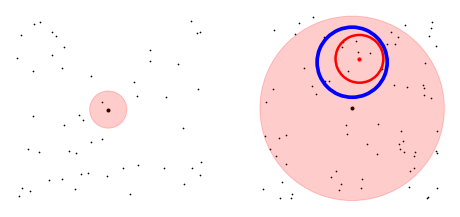

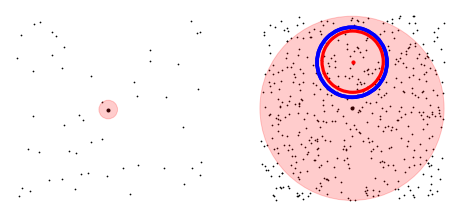

In [76]:

fig, axes = plt.subplots(1,2, figsize = (8,8))

ax = axes[0]

Base = np.random.rand(2,50)
ax.scatter(Base[0],Base[1], s=.5, c="k")


B = Ball([.5,.5],.1)

plot_balls([B], color="red", centers="black", alpha=.2, ax=ax)

ax = axes[1]

B = Ball([.5,.5],.5)
plot_balls([B], color="red", centers="black", alpha=.2, ax=ax)
X = np.random.rand(2,75)
ax.scatter(X[0],X[1], s=.5, c="k")


p = np.array([.5,.75])
closest = np.array([0,0])
d=1
for v in X.T:
    newd = np.linalg.norm(p - v)
    if newd<d:
        d=newd
        closest = v

ax.scatter(closest[0],closest[1],s=10, c="r")

C = Ball(p,.2)

subC = Ball(closest, .2 - d-.02)


plot_circles([C], ax=ax, facecolor="blue",w=.1)
plot_circles([subC], ax=ax, facecolor="red",w=.1)

for ax in axes:
    default(ax)
    
fig, axes = plt.subplots(1,2, figsize = (8,8))


ax = axes[0]
ax.scatter(Base[0],Base[1], s=.5, c="k")

plot_balls([Ball([.5,.5],.05)], color="red", centers="black", alpha=.2, ax=ax)


ax = axes[1]


B = Ball([.5,.5],.5)
plot_balls([B], color="red", centers="black", alpha=.2, ax=ax)

C = Ball([.5,.75],.2)

plot_circles([C], ax=ax, facecolor="blue",w=.1)

X = np.random.rand(2,500)
ax.scatter(X[0],X[1], s=.5, c="k")

p = np.array([.5,.75])
closest = np.array([0,0])
d=1
for v in X.T:
    newd = np.linalg.norm(p - v)
    if newd<d:
        d=newd
        closest = v

ax.scatter(closest[0],closest[1],s=10, c="r")

C = Ball(p,.2)

subC = Ball(closest, .2 - d-.02)


plot_circles([C], ax=ax, facecolor="blue",w=.1)
plot_circles([subC], ax=ax, facecolor="red",w=.1)



for ax in axes:
    default(ax)

/Users/jazzam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/jazzam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sin
  """


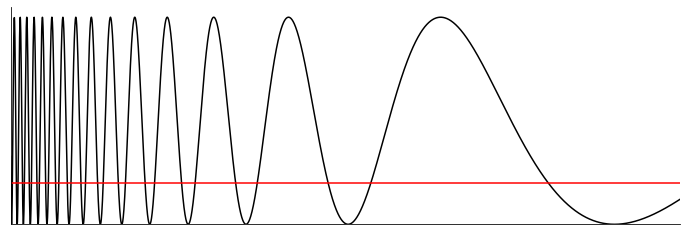

In [127]:
fig, ax = plt.subplots(figsize = (12,4))

x = np.linspace(0,1,10000)

f = np.sin(1/x**2)+1

cmap=plt.cm.Blues

ax.plot(x,f,color="k")
ax.set_xlim([.1,.5])
ax.set_ylim([0,2.1])
ax.set_xticks([])
ax.set_yticks([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot([0,1], [.4,.4], c="r")